In [62]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [63]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List

# Práctica 3: Modelo Lineal

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado incluye multiples características que describen las condiciones de los pasajeros en el accidente del titanic.

- __PassengerId__: Identificador de cada pasajero.
- __Survived__: 0 si no sobrevivió al accidente, 1 si lo hizo.
- __Pclass__: Clase en la que viajaba el pasajero, 1 - Primera clase, 2 - Segunda clase y 3 - Tercera clase.
- __Name__: Nombre del pasajero.
- __Sex__: Sexo del pasajero.
- __Age__: Edad del pasajero.
- __SibSp__: Número de hermanos más número de esposas con las que viajaba el pasajero.
- __Parch__: Número de padres más número de hijos con las que viajaba el pasajero.
- __Ticket__: Número de boleto.
- __Fare__: Tarifa del boleto del pasajero.
- __Cabin__: Número de cabina del pasajero.
- __Embarked__: Puerto de embarcación, C - Cherbourg, Q - Queenstown y S - Southampton.


In [64]:
df = pd.read_csv("titanic.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Asignación 1 &#x1F625;

Realice el preprocesamiento que considere adecuado para que las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Fare__, __Cabin__, __Embarked__ y __Survived__ puedan ser utilizadas por un modelo lineal.

- Pclass la dejaremos igual porque son categorías que siguen un orden.
- Sex le aplicamos OHEncoder
- SibSp le reducimos la asimetría con raíz cuadrada.
- Parch le reducimos la asimetría con raíz cuadrada.
- Fare le reducimos la asimetría con raíz cuadrada.
- Embarked le aplicamos OHEncoder

In [65]:
corr = df.corr()
corr.style.background_gradient(cmap = 'YlOrRd')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [66]:
column = df.SibSp

In [67]:
print(set(column))

{0, 1, 2, 3, 4, 5, 8}


In [68]:
def calc_skewness(x):
    return (((x - x.mean()) / (x.var() ** (1/2))) ** 3).mean()

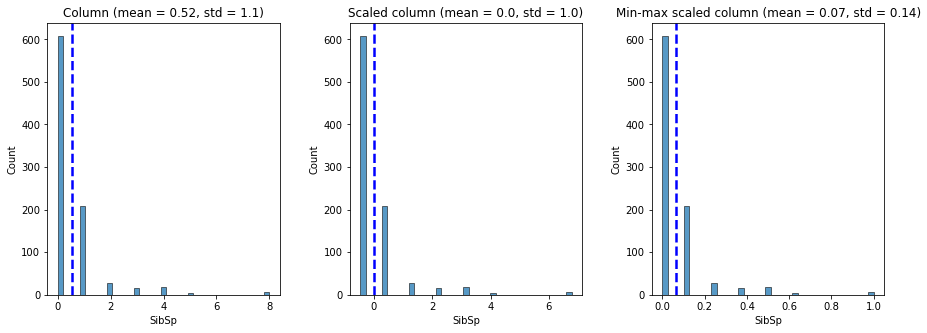

In [69]:
__fig__, __axs__ = plt.subplots(ncols=3, figsize=(15, 5))
__fig__.subplots_adjust(hspace=0.1, wspace=0.3)

__axs__[0].set(title="Column (mean = {}, std = {})".format(round(column.mean(), 2), round((column.var())**(1/2), 2)))
_ = sns.histplot(x=column, ax=__axs__[0])
_.axvline(x=column.mean(),
            color='blue',
            ls='--', 
            lw=2.5)

scaled_column = (column - column.mean()) / (column.var())**(1/2)
__axs__[1].set(title="Scaled column (mean = {}, std = {})".format(round(scaled_column.mean(), 2), round((scaled_column.var())**(1/2), 2)))
_ = sns.histplot(x=scaled_column, ax=__axs__[1])
_.axvline(x=scaled_column.mean(),
            color='blue',
            ls='--', 
            lw=2.5)

minmax_scaled_column = (column - column.min()) / (column.max() - column.min())
__axs__[2].set(title="Min-max scaled column (mean = {}, std = {})".format(round(minmax_scaled_column.mean(), 2), round((minmax_scaled_column.var())**(1/2), 2)))
_ = sns.histplot(x=minmax_scaled_column, ax=__axs__[2])
_.axvline(x=minmax_scaled_column.mean(),
            color='blue',
            ls='--', 
            lw=2.5)

In [70]:
skewness = calc_skewness(column)
skewness

3.682918775041469

In [71]:
column_array = np.array(column.fillna(column.mean()))
column_array[column_array == 0] = 0
#col_function = np.log(column_array)
col_function = (column_array) ** (1/2)
#col_function = (column_array) ** (-1)

In [72]:
improved_skewness = calc_skewness(col_function)
improved_skewness

1.4341069481300395

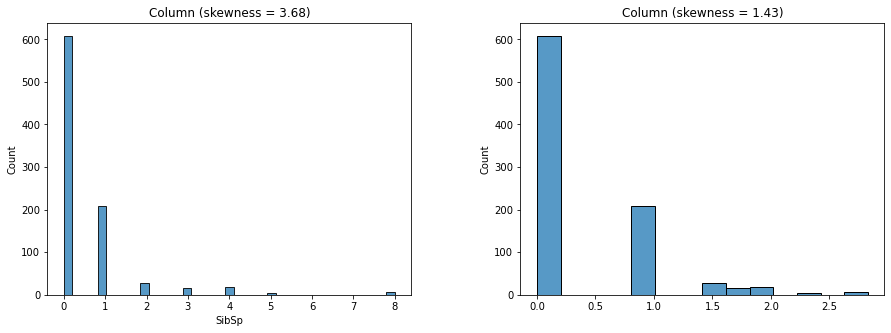

In [73]:
__fig__, __axs__ = plt.subplots(ncols=2, figsize=(15, 5))
__fig__.subplots_adjust(hspace=0.1, wspace=0.3)
__axs__[0].set(title="Column (skewness = {})".format(round(skewness, 2)))
_ = sns.histplot(x=column, ax=__axs__[0])

__axs__[1].set(title="Column (skewness = {})".format(round(improved_skewness, 2)))
_ = sns.histplot(x=col_function, ax=__axs__[1])

#### OneHotEncoder

In [74]:
def ohe(df, columns):
    for col in columns:
        print(col)
        col_encoded = pd.get_dummies(pd.Series(df[col]))
        print(col_encoded.head(3))
        df[['{}_'.format(col) + str(c) for c in list(col_encoded.columns.values)]] = col_encoded
        df = df.drop(columns = col)
        
    return df

In [75]:
pp_df = ohe(df, ['Sex', 'Embarked', 'Pclass'])

Sex
   female  male
0       0     1
1       1     0
2       1     0
Embarked
   C  Q  S
0  0  0  1
1  1  0  0
2  0  0  1
Pclass
   1  2  3
0  0  0  1
1  1  0  0
2  0  0  1


#### Resolver skewness

In [76]:
column = df.SibSp
column_array = np.array(column.fillna(column.mean()))
column_array[column_array == 0] = 0
col_function = (column_array) ** (1/2)
pp_df['SibSp'] = col_function

In [77]:
column = df.Parch
column_array = np.array(column.fillna(column.mean()))
column_array[column_array == 0] = 0
col_function = (column_array) ** (1/2)
pp_df['Parch'] = col_function

In [78]:
column = df.Fare
column_array = np.array(column.fillna(column.mean()))
column_array[column_array == 0] = 0
col_function = (column_array) ** (1/2)
pp_df['Fare'] = col_function

In [79]:
pp_df = pp_df.drop(columns = ['PassengerId', 'Name', 'Age', 'Ticket', 'Cabin'])

In [80]:
pp_df.head()

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1.0,0.0,2.692582,0,1,0,0,1,0,0,1
1,1,1.0,0.0,8.442944,1,0,1,0,0,1,0,0
2,1,0.0,0.0,2.815138,1,0,0,0,1,0,0,1
3,1,1.0,0.0,7.286975,1,0,0,0,1,1,0,0
4,0,0.0,0.0,2.837252,0,1,0,0,1,0,0,1


#### Normalización

In [81]:
def scale_data(data, cols):
    for c in cols:
        column = data[c]
        sc_column = scale_column(column)
        data[c] = sc_column
    return data

In [82]:
def scale_column(x):
    return (x - x.mean()) / x.std()

In [83]:
pp_df = scale_data(pp_df, ['SibSp', 'Parch', 'Fare'])

In [84]:
pp_df

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1.003846,-0.539444,-0.732705,0,1,0,0,1,0,0,1
1,1,1.003846,-0.539444,1.219137,1,0,1,0,0,1,0,0
2,1,-0.629184,-0.539444,-0.691106,1,0,0,0,1,0,0,1
3,1,1.003846,-0.539444,0.826767,1,0,0,0,1,1,0,0
4,0,-0.629184,-0.539444,-0.683600,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.629184,-0.539444,-0.422817,0,1,0,0,1,0,1,0
887,1,-0.629184,-0.539444,0.212485,1,0,0,0,1,1,0,0
888,0,1.003846,2.060647,-0.002953,1,0,0,0,1,0,0,1
889,1,-0.629184,-0.539444,0.212485,0,1,1,0,0,1,0,0


## Asignación 2 &#x1F625;

Utilizando las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Fare__, __Cabin__ y __Embarked__, entrene un clasificador lineal para predecir __Survived__ utilizando el algoritmo _pocket_. Imprima el error obtenido.

In [85]:
def __random_fn_def__():
    def __random_fn__(shape):
        return np.zeros(shape)
    
    return __random_fn__
    
__random_fn__ = __random_fn_def__()

In [86]:
def train_pla(
    data,
    target,
    prev_model,
    max_iters=1000
) -> np.array: 
    """
    Descripción:
    Esta funcion ejecuta una variante del algoritmo PLA para clasificar datos linealmente separables.
    
    Entradas:
    - data: Indica las características utilizadas para la clasificación.
    - target: Indíca las etiquetas que se esperan obtener despues de una correcta clasificación.
    - max_iters: Indica el número máximo de iteraciones del algoritmo. Si el algoritmo no converge
                antes del número máximo de iteraciones, se detiene y devuelve los parámetros 
                calculados hasta el momento.
            
    Salidas:
    - Un arreglo de numpy indicando los parámetros calculados
    """
        
    model = __random_fn__((data.shape[1],))
    
    # CÓDIGO AQUÍ
    
    labels = np.zeros((data.shape[0]))
    for j in range(data.shape[0]):
        if prev_model @ data[j] >= 0:
            labels[j] = 1
        else: 
            labels[j] = -1
    misclassified_points_indexes = list()
    for l in range(data.shape[0]):
        if labels[l] != target[l]:
            misclassified_points_indexes.append(l)
    #print(len(misclassified_points_indexes))
    if len(misclassified_points_indexes) != 0:
        msclf_index = np.random.choice(misclassified_points_indexes, 1)
        #print(msclf_index)
        #print(target[msclf_index].T @ data[msclf_index])
        model = prev_model + (target[msclf_index].T @ data[msclf_index])
    
    return np.ravel(model)

In [87]:
def sign(x):
    if x >= 0:
        return 1
    else:
        return -1

In [88]:
def match_results(a, b):
    if a != b:
        return 1
    else:
        return 0

In [89]:
def E_in_pocket(X, y, w):
    acum_sum = 0
    for i in range(X.shape[0]):
        acum_sum += match_results(sign(w.T @ X[i]), y[i])
    
    return acum_sum / X.shape[0]

In [90]:
def pocket(X, y, T):
    w = list()
    e_ins = list()
    w_0 = __random_fn__((X.shape[1]))
    w.append(w_0)
    w_opt = w_0
    e_in_0 = E_in_pocket(X, y, w_0)
    e_ins.append(e_in_0)
    
    for i in range(T):
        w_next = train_pla(X, y, w[-1])
        w.append(w_next)
        print("Itera {}".format(i))
        #print("w[{}]".format(i))
        print(X.shape)
        print(w_next.shape)
        e_in = E_in_pocket(X, y, w_next)
        print(e_in)
        
        e_ins.append(e_in)
        e_in_best = E_in_pocket(X, y, w_opt)
        e_in_next = e_ins[-1]
        if e_in_next < e_in_best:
            w_opt = w_next
    
    return w_opt

#### Ajustes en las columnas (reordenar)

In [91]:
pp_df_aux = pp_df

In [92]:
pp_df_aux['Survived'] = pp_df_aux['Survived'].replace(0, -1)

In [93]:
pp_df_aux

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,-1,1.003846,-0.539444,-0.732705,0,1,0,0,1,0,0,1
1,1,1.003846,-0.539444,1.219137,1,0,1,0,0,1,0,0
2,1,-0.629184,-0.539444,-0.691106,1,0,0,0,1,0,0,1
3,1,1.003846,-0.539444,0.826767,1,0,0,0,1,1,0,0
4,-1,-0.629184,-0.539444,-0.683600,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-1,-0.629184,-0.539444,-0.422817,0,1,0,0,1,0,1,0
887,1,-0.629184,-0.539444,0.212485,1,0,0,0,1,1,0,0
888,-1,1.003846,2.060647,-0.002953,1,0,0,0,1,0,0,1
889,1,-0.629184,-0.539444,0.212485,0,1,1,0,0,1,0,0


In [94]:
#pp_df_aux_cols = list(pp_df_aux.columns.values)
#pp_df_aux_cols = [pp_df_aux_cols[-1]] + pp_df_aux_cols[0:-1]
#pp_df_aux = pp_df_aux[pp_df_aux_cols]

In [95]:
X = np.array(pp_df_aux.drop(columns = ['Survived']))
X = np.insert(X, 0, 1, axis = 1)
y = np.array(pp_df_aux['Survived'])

In [96]:
X.shape

(891, 12)

In [97]:
w_opt = pocket(X, y, 1000)

Itera 0
(891, 12)
(12,)
0.35129068462401797
Itera 1
(891, 12)
(12,)
0.26038159371492703
Itera 2
(891, 12)
(12,)
0.3759820426487093
Itera 3
(891, 12)
(12,)
0.24915824915824916
Itera 4
(891, 12)
(12,)
0.3277216610549944
Itera 5
(891, 12)
(12,)
0.30190796857463525
Itera 6
(891, 12)
(12,)
0.2962962962962963
Itera 7
(891, 12)
(12,)
0.25140291806958476
Itera 8
(891, 12)
(12,)
0.5881032547699214
Itera 9
(891, 12)
(12,)
0.250280583613917
Itera 10
(891, 12)
(12,)
0.3468013468013468
Itera 11
(891, 12)
(12,)
0.2558922558922559
Itera 12
(891, 12)
(12,)
0.3164983164983165
Itera 13
(891, 12)
(12,)
0.35129068462401797
Itera 14
(891, 12)
(12,)
0.3176206509539843
Itera 15
(891, 12)
(12,)
0.2143658810325477
Itera 16
(891, 12)
(12,)
0.31313131313131315
Itera 17
(891, 12)
(12,)
0.25252525252525254
Itera 18
(891, 12)
(12,)
0.3153759820426487
Itera 19
(891, 12)
(12,)
0.24579124579124578
Itera 20
(891, 12)
(12,)
0.2727272727272727
Itera 21
(891, 12)
(12,)
0.2244668911335578
Itera 22
(891, 12)
(12,)
0.2558922

Itera 183
(891, 12)
(12,)
0.31425364758698093
Itera 184
(891, 12)
(12,)
0.29180695847362514
Itera 185
(891, 12)
(12,)
0.3894500561167228
Itera 186
(891, 12)
(12,)
0.3288439955106622
Itera 187
(891, 12)
(12,)
0.24354657687991021
Itera 188
(891, 12)
(12,)
0.3221099887766554
Itera 189
(891, 12)
(12,)
0.33221099887766553
Itera 190
(891, 12)
(12,)
0.24579124579124578
Itera 191
(891, 12)
(12,)
0.2345679012345679
Itera 192
(891, 12)
(12,)
0.30078563411896747
Itera 193
(891, 12)
(12,)
0.2839506172839506
Itera 194
(891, 12)
(12,)
0.37149270482603813
Itera 195
(891, 12)
(12,)
0.6127946127946128
Itera 196
(891, 12)
(12,)
0.6105499438832772
Itera 197
(891, 12)
(12,)
0.33557800224466894
Itera 198
(891, 12)
(12,)
0.345679012345679
Itera 199
(891, 12)
(12,)
0.32098765432098764
Itera 200
(891, 12)
(12,)
0.29741863075196406
Itera 201
(891, 12)
(12,)
0.34118967452300786
Itera 202
(891, 12)
(12,)
0.29180695847362514
Itera 203
(891, 12)
(12,)
0.25813692480359146
Itera 204
(891, 12)
(12,)
0.300785634118967

Itera 367
(891, 12)
(12,)
0.5780022446689114
Itera 368
(891, 12)
(12,)
0.2648709315375982
Itera 369
(891, 12)
(12,)
0.26374859708193044
Itera 370
(891, 12)
(12,)
0.5589225589225589
Itera 371
(891, 12)
(12,)
0.6094276094276094
Itera 372
(891, 12)
(12,)
0.30864197530864196
Itera 373
(891, 12)
(12,)
0.2940516273849607
Itera 374
(891, 12)
(12,)
0.3546576879910213
Itera 375
(891, 12)
(12,)
0.2940516273849607
Itera 376
(891, 12)
(12,)
0.2940516273849607
Itera 377
(891, 12)
(12,)
0.28619528619528617
Itera 378
(891, 12)
(12,)
0.5353535353535354
Itera 379
(891, 12)
(12,)
0.31986531986531985
Itera 380
(891, 12)
(12,)
0.3108866442199775
Itera 381
(891, 12)
(12,)
0.3288439955106622
Itera 382
(891, 12)
(12,)
0.569023569023569
Itera 383
(891, 12)
(12,)
0.29741863075196406
Itera 384
(891, 12)
(12,)
0.5420875420875421
Itera 385
(891, 12)
(12,)
0.2570145903479237
Itera 386
(891, 12)
(12,)
0.244668911335578
Itera 387
(891, 12)
(12,)
0.5016835016835017
Itera 388
(891, 12)
(12,)
0.2570145903479237
Itera 3

0.2716049382716049
Itera 556
(891, 12)
(12,)
0.28170594837261503
Itera 557
(891, 12)
(12,)
0.2222222222222222
Itera 558
(891, 12)
(12,)
0.24242424242424243
Itera 559
(891, 12)
(12,)
0.500561167227834
Itera 560
(891, 12)
(12,)
0.244668911335578
Itera 561
(891, 12)
(12,)
0.24691358024691357
Itera 562
(891, 12)
(12,)
0.26038159371492703
Itera 563
(891, 12)
(12,)
0.25252525252525254
Itera 564
(891, 12)
(12,)
0.2255892255892256
Itera 565
(891, 12)
(12,)
0.22109988776655443
Itera 566
(891, 12)
(12,)
0.250280583613917
Itera 567
(891, 12)
(12,)
0.24242424242424243
Itera 568
(891, 12)
(12,)
0.5712682379349046
Itera 569
(891, 12)
(12,)
0.5465768799102132
Itera 570
(891, 12)
(12,)
0.4826038159371493
Itera 571
(891, 12)
(12,)
0.5611672278338945
Itera 572
(891, 12)
(12,)
0.27946127946127947
Itera 573
(891, 12)
(12,)
0.2345679012345679
Itera 574
(891, 12)
(12,)
0.2547699214365881
Itera 575
(891, 12)
(12,)
0.5611672278338945
Itera 576
(891, 12)
(12,)
0.2558922558922559
Itera 577
(891, 12)
(12,)
0.409

Itera 739
(891, 12)
(12,)
0.5286195286195287
Itera 740
(891, 12)
(12,)
0.3378226711560045
Itera 741
(891, 12)
(12,)
0.2345679012345679
Itera 742
(891, 12)
(12,)
0.5342312008978676
Itera 743
(891, 12)
(12,)
0.2345679012345679
Itera 744
(891, 12)
(12,)
0.2345679012345679
Itera 745
(891, 12)
(12,)
0.19865319865319866
Itera 746
(891, 12)
(12,)
0.22671156004489337
Itera 747
(891, 12)
(12,)
0.2132435465768799
Itera 748
(891, 12)
(12,)
0.21548821548821548
Itera 749
(891, 12)
(12,)
0.21548821548821548
Itera 750
(891, 12)
(12,)
0.21773288439955107
Itera 751
(891, 12)
(12,)
0.26823793490460157
Itera 752
(891, 12)
(12,)
0.2615039281705948
Itera 753
(891, 12)
(12,)
0.38496071829405165
Itera 754
(891, 12)
(12,)
0.26262626262626265
Itera 755
(891, 12)
(12,)
0.2570145903479237
Itera 756
(891, 12)
(12,)
0.26262626262626265
Itera 757
(891, 12)
(12,)
0.20987654320987653
Itera 758
(891, 12)
(12,)
0.24803591470258138
Itera 759
(891, 12)
(12,)
0.5488215488215489
Itera 760
(891, 12)
(12,)
0.5948372615039281

0.38047138047138046
Itera 926
(891, 12)
(12,)
0.40291806958473625
Itera 927
(891, 12)
(12,)
0.5723905723905723
Itera 928
(891, 12)
(12,)
0.5813692480359147
Itera 929
(891, 12)
(12,)
0.3939393939393939
Itera 930
(891, 12)
(12,)
0.30078563411896747
Itera 931
(891, 12)
(12,)
0.24579124579124578
Itera 932
(891, 12)
(12,)
0.3153759820426487
Itera 933
(891, 12)
(12,)
0.3052749719416386
Itera 934
(891, 12)
(12,)
0.3961840628507295
Itera 935
(891, 12)
(12,)
0.5802469135802469
Itera 936
(891, 12)
(12,)
0.3961840628507295
Itera 937
(891, 12)
(12,)
0.35353535353535354
Itera 938
(891, 12)
(12,)
0.21997755331088664
Itera 939
(891, 12)
(12,)
0.3490460157126824
Itera 940
(891, 12)
(12,)
0.29741863075196406
Itera 941
(891, 12)
(12,)
0.2615039281705948
Itera 942
(891, 12)
(12,)
0.3288439955106622
Itera 943
(891, 12)
(12,)
0.5824915824915825
Itera 944
(891, 12)
(12,)
0.531986531986532
Itera 945
(891, 12)
(12,)
0.6060606060606061
Itera 946
(891, 12)
(12,)
0.5723905723905723
Itera 947
(891, 12)
(12,)
0.54

In [98]:
w_opt

array([ 0.        , -0.90454982, -1.85197389,  2.20706444,  5.        ,
       -5.        ,  1.        ,  0.        , -1.        ,  0.        ,
        1.        , -1.        ])

In [99]:
E_in_pocket(X, y, w_opt)

0.19865319865319866

## Asignación 3 &#x1F625;

Utilizando las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Cabin__ y __Embarked__, entrene una regresión lineal para predecir __Fare__ utilizando el algoritmo de Ordinary Leasts Squares (OLS). Imprima el valor del error cuadrático medio (MSE).

In [100]:
pp_df_aux

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,-1,1.003846,-0.539444,-0.732705,0,1,0,0,1,0,0,1
1,1,1.003846,-0.539444,1.219137,1,0,1,0,0,1,0,0
2,1,-0.629184,-0.539444,-0.691106,1,0,0,0,1,0,0,1
3,1,1.003846,-0.539444,0.826767,1,0,0,0,1,1,0,0
4,-1,-0.629184,-0.539444,-0.683600,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-1,-0.629184,-0.539444,-0.422817,0,1,0,0,1,0,1,0
887,1,-0.629184,-0.539444,0.212485,1,0,0,0,1,1,0,0
888,-1,1.003846,2.060647,-0.002953,1,0,0,0,1,0,0,1
889,1,-0.629184,-0.539444,0.212485,0,1,1,0,0,1,0,0


In [101]:
def ols(X, Y):
    beta_hat = np.matmul(np.linalg.pinv(X), Y)
    return beta_hat

In [102]:
X = np.array(pp_df_aux.drop(columns = ['Survived', 'Fare']))
X = np.insert(X, 0, 1, axis = 1)
y = np.array(pp_df_aux['Fare'])

In [103]:
X

array([[ 1.        ,  1.00384576, -0.53944444, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  1.00384576, -0.53944444, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        , -0.62918408, -0.53944444, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.        ,  1.00384576,  2.06064749, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , -0.62918408, -0.53944444, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        , -0.62918408, -0.53944444, ...,  0.        ,
         0.        ,  1.        ]])

In [104]:
X.shape

(891, 11)

In [105]:
w_lin = ols(X, y)
w_lin

array([ 0.31905176,  0.20351645,  0.2073766 ,  0.22722178,  0.09182997,
       -0.20020128, -0.40438923, -0.43070579,  1.08294695, -0.24330183,
       -0.52059336])

In [106]:
def mse(X, y, w):
    return (((X @ w.T) - y) ** 2).mean()

In [107]:
mse(X, y, w_lin)

0.3663338220243986

In [108]:
import statsmodels.api as sm
result = sm.OLS(y, X, hasconst = True).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     190.4
Date:                Fri, 24 Mar 2023   Prob (F-statistic):          2.83e-186
Time:                        09:19:05   Log-Likelihood:                -816.90
No. Observations:                 891   AIC:                             1652.
Df Residuals:                     882   BIC:                             1695.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3191      0.236      1.353      0.1

In [109]:
result.params

array([ 0.31905176,  0.20351645,  0.2073766 ,  0.22722178,  0.09182997,
       -0.20020128, -0.40438923, -0.43070579,  1.08294695, -0.24330183,
       -0.52059336])

In [110]:
X @ result.params

array([-0.44798645,  1.52145019, -0.64494307,  1.29094567, -0.78033489,
       -0.75401833,  0.82320543,  0.17658021, -0.10574484,  0.1952014 ,
        0.06867608,  0.95859724, -0.78033489,  0.40456081, -0.64494307,
       -0.36765154,  0.29194926, -0.50304336, -0.31259464, -0.41443856,
       -0.50304336, -0.50304336, -0.61862652,  0.82320543,  0.31197202,
        0.53995262, -0.54983038,  1.93804803, -0.61862652, -0.78033489,
        1.05370994,  1.52145019, -0.61862652, -0.50304336,  1.38605837,
        1.15555386, -0.54983038, -0.78033489, -0.17493141, -0.08209013,
       -0.31259464, -0.03530311, -0.54983038,  0.73439963, -0.61862652,
       -0.78033489, -0.4216699 , -0.61862652, -0.07981871, -0.31259464,
        0.26563271, -0.78033489,  1.52145019, -0.03530311,  1.43498067,
        0.82320543, -0.36765154, -0.54983038,  0.50389512,  0.50201703,
       -0.54983038,  1.38930303,  1.15555386,  0.33450772,  1.05370994,
        0.16378878, -0.36765154, -0.78033489,  0.55895202, -0.31

In [111]:
X @ w_lin.T

array([-0.44798645,  1.52145019, -0.64494307,  1.29094567, -0.78033489,
       -0.75401833,  0.82320543,  0.17658021, -0.10574484,  0.1952014 ,
        0.06867608,  0.95859724, -0.78033489,  0.40456081, -0.64494307,
       -0.36765154,  0.29194926, -0.50304336, -0.31259464, -0.41443856,
       -0.50304336, -0.50304336, -0.61862652,  0.82320543,  0.31197202,
        0.53995262, -0.54983038,  1.93804803, -0.61862652, -0.78033489,
        1.05370994,  1.52145019, -0.61862652, -0.50304336,  1.38605837,
        1.15555386, -0.54983038, -0.78033489, -0.17493141, -0.08209013,
       -0.31259464, -0.03530311, -0.54983038,  0.73439963, -0.61862652,
       -0.78033489, -0.4216699 , -0.61862652, -0.07981871, -0.31259464,
        0.26563271, -0.78033489,  1.52145019, -0.03530311,  1.43498067,
        0.82320543, -0.36765154, -0.54983038,  0.50389512,  0.50201703,
       -0.54983038,  1.38930303,  1.15555386,  0.33450772,  1.05370994,
        0.16378878, -0.36765154, -0.78033489,  0.55895202, -0.31

## Asignación 4 &#x1F921;

Utilizando las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Fare__, __Cabin__ y __Embarked__, entrene un clasificador lineal para predecir la probabilidad de supervivencia __Survived__ utilizando el algoritmo de gradiente descendente estocástico y la entropía cruzada como función de error. Imprima el arror en cada iteración del gradiente.

In [112]:
X = np.array(pp_df_aux.drop(columns = ['Survived']))
X = np.insert(X, 0, 1, axis = 1)
y = np.array(pp_df_aux['Survived'])

In [113]:
X.shape

(891, 12)

In [114]:
def E_in_log_reg_sgd(X, y, w):
    return np.mean(np.log(1 + np.exp(X @ w * y)))

In [115]:
def sigmoid(x):
    return np.exp(x) / (1 + np.exp(x))

In [116]:
def cross_entropy(X, y, w):
    res = list()
    for i in range(X.shape[0]):
        res.append((match_results(y[i], 1) * np.log(1 / sigmoid(X[i] @ w))) + (match_results(y[i], -1) * np.log(1 / (1 - sigmoid(X[i] @ w)))))
    
    return np.sum(res)

In [117]:
def cross_entropy_f(X, y, w, N):
    res = list()
    for i in range(X.shape[0]):
        res.append(y[i] * X[i] / (1 + np.exp(y[i] * X[i] @ w)))
    
    return - (1 / N) * np.sum(res)

In [118]:
def FF_CrossEntropy(X, y, w):
    z = - np.dot(X, w)
    p = 1/(1+np.exp(z))

    crossEntropy = (-y + p)/(p*(1-p)) 

    return crossEntropy

In [119]:
def f_grad(X, y, w):
    return (-y * X) * sigmoid(-y * w.T @ X)

In [120]:
def logistic_reg_sgd(X, y, lr, T = 100, badge_size = 1):
    N = X.shape[0]
    acum_sum = 0
    w = __random_fn__((X.shape[1]))
    w_next = w
    for i in range(T):
        print("Epoch {}".format(i))
        indexes = [ind for ind in range(N)]
        badge_indexes = np.random.choice(indexes, badge_size, False)
        X_badges = X[badge_indexes]
        y_badges = y[badge_indexes]
        grad_desc_w = cross_entropy_f(X_badges, y_badges, w, N)
        #lr_mod = lr * np.linalg.norm(grad_desc_w)
        lr_mod = lr
        w_next = w - lr_mod * grad_desc_w
        w = w_next
        e_in = E_in_log_reg_sgd(X, y, w_next)
        cee = cross_entropy_f(X, y, w_next, N)
        print(cee)
    return w

In [121]:
w_log_sgd = logistic_reg_sgd(X, y, 0.001, 1000)

Epoch 0
0.233594447593136
Epoch 1
0.23360349374495906
Epoch 2
0.23360982294251456
Epoch 3
0.23363097384760403
Epoch 4
0.23364835811893764
Epoch 5
0.2336372546917467
Epoch 6
0.23364404432631825
Epoch 7
0.23363766119685833
Epoch 8
0.23363050302515354
Epoch 9
0.23365331800986597
Epoch 10
0.23366010762090703
Epoch 11
0.23367665678103222
Epoch 12
0.2336643106276111
Epoch 13
0.23364170312751734
Epoch 14
0.23364808611308951
Epoch 15
0.23365921808932938
Epoch 16
0.23366555550152154
Epoch 17
0.23365932218595634
Epoch 18
0.2336520266752937
Epoch 19
0.2336720621023908
Epoch 20
0.2336657139598254
Epoch 21
0.23365933080232623
Epoch 22
0.2336424034716297
Epoch 23
0.23363888251642384
Epoch 24
0.23365270505224284
Epoch 25
0.23364632191157608
Epoch 26
0.23362971477033265
Epoch 27
0.23365158480343945
Epoch 28
0.23362653697388563
Epoch 29
0.2336202031798508
Epoch 30
0.23365202019784315
Epoch 31
0.23366843956719086
Epoch 32
0.2336622400766509
Epoch 33
0.2336558792327112
Epoch 34
0.23364716029796695
Epoch 

0.2333577122466771
Epoch 282
0.23335027882384635
Epoch 283
0.23334392361704956
Epoch 284
0.23333756841841646
Epoch 285
0.23334389795420715
Epoch 286
0.23335632100589093
Epoch 287
0.2333316948148799
Epoch 288
0.2333483777035386
Epoch 289
0.2333721766208814
Epoch 290
0.2333785143991979
Epoch 291
0.23336985024814372
Epoch 292
0.23336361339889367
Epoch 293
0.2333573812440645
Epoch 294
0.23337674747095902
Epoch 295
0.23337051451197022
Epoch 296
0.2333894989604682
Epoch 297
0.23341373711255836
Epoch 298
0.23344009497252308
Epoch 299
0.23344642437795632
Epoch 300
0.23343926651758903
Epoch 301
0.23342348418826553
Epoch 302
0.2334168542590935
Epoch 303
0.23343989443635704
Epoch 304
0.233436373560934
Epoch 305
0.23343004453487534
Epoch 306
0.2334228867011857
Epoch 307
0.23341655769230246
Epoch 308
0.23341020240038018
Epoch 309
0.23342995286510682
Epoch 310
0.23343904530199075
Epoch 311
0.233415295335572
Epoch 312
0.2334089125022646
Epoch 313
0.23341570247115326
Epoch 314
0.23339085015845112
Epoc

0.2329536754037061
Epoch 564
0.23296588780226352
Epoch 565
0.2329483031549669
Epoch 566
0.23292632834325816
Epoch 567
0.23289974696793447
Epoch 568
0.23288121075605317
Epoch 569
0.2328959378348346
Epoch 570
0.23288878087199283
Epoch 571
0.23290121202501277
Epoch 572
0.23289405505356256
Epoch 573
0.2328690860824359
Epoch 574
0.232887054074868
Epoch 575
0.23286293144927192
Epoch 576
0.2328445657297302
Epoch 577
0.2328379833070589
Epoch 578
0.23285459649154544
Epoch 579
0.23284836028043782
Epoch 580
0.23283970481693128
Epoch 581
0.23283337655172062
Epoch 582
0.232819863009578
Epoch 583
0.23279739355376605
Epoch 584
0.2327910390580544
Epoch 585
0.23278425051835788
Epoch 586
0.23277786850360688
Epoch 587
0.23279429207530283
Epoch 588
0.23281433843562305
Epoch 589
0.2328206874574744
Epoch 590
0.2328143592165475
Epoch 591
0.23280800469898963
Epoch 592
0.23280162265338433
Epoch 593
0.23279539119363082
Epoch 594
0.23277055106206596
Epoch 595
0.23277771047905382
Epoch 596
0.23278881683440653
Epo

0.23236148226786071
Epoch 840
0.23235161711985458
Epoch 841
0.23234526319875148
Epoch 842
0.23233660151788224
Epoch 843
0.232330255089398
Epoch 844
0.23233741522010923
Epoch 845
0.23235384583752308
Epoch 846
0.23234749191354426
Epoch 847
0.23233644327115177
Epoch 848
0.23232887696679486
Epoch 849
0.2323467302896254
Epoch 850
0.23234043910918367
Epoch 851
0.23235618051631052
Epoch 852
0.2323428559283339
Epoch 853
0.23236246018556064
Epoch 854
0.23235613253038065
Epoch 855
0.23234975107226996
Epoch 856
0.23233191024413857
Epoch 857
0.23231291802681517
Epoch 858
0.232336533094591
Epoch 859
0.23232896679006987
Epoch 860
0.23231743595038082
Epoch 861
0.23231103536420541
Epoch 862
0.23230424753053017
Epoch 863
0.23229801589981897
Epoch 864
0.23230432856776012
Epoch 865
0.2323233252065278
Epoch 866
0.2323043330879138
Epoch 867
0.23231826859473972
Epoch 868
0.23234110526315715
Epoch 869
0.23235438746353454
Epoch 870
0.23234800600769495
Epoch 871
0.23231239437385862
Epoch 872
0.2323196733209737